In [ ]:
s!pip install kneed
from kneed import KneeLocator
import pandas as pd
import numpy as np
!pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
resp = requests.get("https://www.imdb.com/list/ls538168505/?ref_=watch_wchgd_1_1_m_pks_martv_ft_t")
soup = BeautifulSoup(resp.text)

In [ ]:
titles = []
title = soup.find_all("h3", {'class':'lister-item-header'})
for i in title:
  titles.append(i.a.text)
len(titles)

98

In [ ]:
genres = []
genre = soup.find_all("div", {'class':'lister-item-content'})
#genre = soup.find_all("span", {'class':'genre'})
for i in genre:
  try:
    genres.append(i.find("span", {'class':'genre'}).text.strip().split(", "))
  except:
    genres.append(["null"])
len(genres)

98

In [ ]:
descriptions = []
description = soup.find_all("p",{"class":""})
counter = 0
for i in description[1:]:
  if counter == 0:
    descriptions.append(i.text.strip())
    counter += 1
  else:
    counter = 0
len(descriptions)

98

In [ ]:
platforms = []
platform = soup.find_all("p",{"class":""})
counter = 0
for i in platform[1:]:
  if counter == 1:
    platforms.append(i.text.strip().split("on ")[-1])
    counter = 0
  else:
    counter +=1
len(platforms)

98

In [ ]:
ratings = []
rating = soup.find_all("div", {'class':'lister-item-content'})
for i in rating:
  try:
    ratings.append(i.find("span",{"class":"ipl-rating-star__rating"}).text)
  except:
    ratings.append("-1")
len(ratings)

98

In [ ]:
streaming_df = pd.DataFrame({'Title':titles, 'Genre': genres, 'Platform': platforms, 'Rating':ratings}) #'Descriptions': descriptions, 
streaming_df["Platform"] = pd.Categorical(streaming_df["Platform"])
streaming_df["Rating"] = pd.to_numeric(streaming_df["Rating"])
streaming_df

,Title,Genre,Platform,Rating
0,The Larry David Story,"[Documentary, Biography]",HBO,-1.0
1,Against the Ice,"[Adventure, Drama, History]",Netflix,6.5
2,Dicktown,"[Animation, Comedy, Mystery]",FXX,6.7
3,The Dropout,"[Biography, Drama]",Hulu,7.5
4,Echos,[Drama],Sundance Now,6.1
...,...,...,...,...
93,The Fairly OddParents: Fairly Odder,"[Adventure, Comedy, Family]",Paramount Plus,2.3
94,How We Roll,[Comedy],CBS,5.1
95,Julia,"[Biography, Drama]",HBO Max,8.4
96,Rat in the Kitchen,[Game-Show],TBS,6.8


In [ ]:
genres = streaming_df["Genre"].tolist()
uniqueGenres = []
for i in genres:
  for j in i:
    if j not in uniqueGenres:
      uniqueGenres.append(j)

foo = []
for k in uniqueGenres:
  bar = []
  for l in range(0,len(streaming_df)):
    if k in streaming_df['Genre'].iloc[l]:
      bar.append(1)
    else:
      bar.append(0)
  foo.append(bar)

In [ ]:
count = 0
for i in uniqueGenres:
  streaming_df[i] = foo[count]
  count += 1

In [ ]:
streaming_df

,Title,Genre,Platform,Rating,Documentary,Biography,Adventure,Drama,History,Animation,...,Romance,Game-Show,Music,News,Fantasy,Sport,Western,Family,Sci-Fi,null
0,The Larry David Story,"[Documentary, Biography]",HBO,-1.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Against the Ice,"[Adventure, Drama, History]",Netflix,6.5,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Dicktown,"[Animation, Comedy, Mystery]",FXX,6.7,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,新創大騙局,"[Biography, Drama]",Hulu,7.5,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Katakomben,[Drama],Sundance Now,6.1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,The Fairly Oddparents: Fairly Odder,"[Adventure, Comedy, Family]",Paramount Plus,2.3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
94,How We Roll,[Comedy],CBS,5.1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,Julia,"[Biography, Drama]",HBO Max,8.4,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
96,Rat in the Kitchen,[Game-Show],TBS,6.7,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 200.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 200.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 200.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 200.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 200.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 17, cost: 170.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 187.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, i

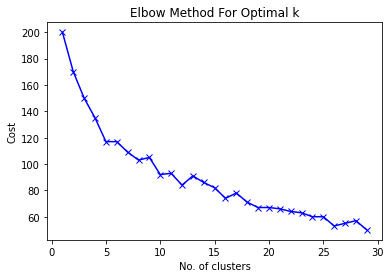

In [ ]:
# Running Kmodes clustering and determining which number of clusters minimizes "cost", without including too many clusters
cost = []
K = range(1,30)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(streaming_df.iloc[:,4:])
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

Optimal Clusters: 5


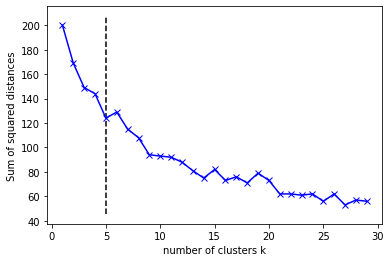

In [ ]:
kn = KneeLocator(range(1, 30), cost, curve='convex', direction='decreasing')
plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.plot(range(1, 30), cost, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
print('Optimal Clusters:',kn.knee)

In [ ]:
# A list holds the silhouette coefficients for each k
# silhouette_coefficients = []

# # Notice you start at 2 clusters for silhouette coefficient
# for k in range(2, 11):
#     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
#     kmeans.fit(scaled_features)
#     score = silhouette_score(scaled_features, kmeans.labels_)
#     silhouette_coefficients.append(score)

In [ ]:
kmode = KModes(n_clusters=15, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(streaming_df.iloc[:,3:])
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 12, cost: 172.0
Run 1, iteration: 2/100, moves: 0, cost: 172.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 33, cost: 168.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 14, cost: 163.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 26, cost: 165.0
Run 4, iteration: 2/100, moves: 9, cost: 162.0
Run 4, iteration: 3/100, moves: 1, cost: 162.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 20, cost: 174.0
Best run was number 4


array([10,  4,  2, 12, 12,  2,  3,  3, 12, 12, 13, 10,  8,  0, 10,  0, 12,
        0,  0, 10,  0,  0, 12,  8, 12,  0,  0, 12, 12, 11,  9, 11, 12,  0,
        0,  3,  0,  1,  0,  5, 12,  7,  3, 12, 14, 12,  0,  3,  2,  2,  6,
        6, 11,  2,  0,  2, 11,  2, 11,  0,  0,  0,  2,  2, 12,  2,  3,  7,
       12,  2,  2, 12, 12,  0,  4, 14,  0, 12,  9,  9,  2,  3, 11,  2,  3,
       12, 12,  0,  6, 11,  9,  3,  6,  7,  2, 12,  0, 12], dtype=uint16)

In [ ]:
streaming_df.insert(0, "Cluster", clusters, True)

In [ ]:
streaming_df

,Cluster,Title,Genre,Platform,Rating,Documentary,Biography,Adventure,Drama,History,...,Romance,Game-Show,Music,News,Fantasy,Sport,Western,Family,Sci-Fi,null
0,10,The Larry David Story,"[Documentary, Biography]",HBO,-1.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,Against the Ice,"[Adventure, Drama, History]",Netflix,6.5,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2,Dicktown,"[Animation, Comedy, Mystery]",FXX,6.7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,The Dropout,"[Biography, Drama]",Hulu,7.5,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,12,Echos,[Drama],Sundance Now,6.1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,7,The Fairly OddParents: Fairly Odder,"[Adventure, Comedy, Family]",Paramount Plus,2.3,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
94,2,How We Roll,[Comedy],CBS,5.1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,12,Julia,"[Biography, Drama]",HBO Max,8.4,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
96,0,Rat in the Kitchen,[Game-Show],TBS,6.8,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
movie = {'Horror':1.0, 'Action':2.0, 'Comedy':6.0, 'Mystery':3.0, 
          'Romance':4.0, 'Sci-Fi':5.0, 'Fantasy':3.0}

userScores = []
for j in range(len(streaming_df)):
  userScore = 0
  for i in movie:
    if (int(streaming_df.iloc[[j]][i].values[0])==1):
      userScore += movie[i]
  userScore += streaming_df.iloc[[j]]["Rating"].values[0]
  userScores.append(userScore)
streaming_df["User Score"] = userScores


In [ ]:
streaming_df

,Cluster,Title,Genre,Platform,Rating,Documentary,Biography,Adventure,Drama,History,...,Game-Show,Music,News,Fantasy,Sport,Western,Family,Sci-Fi,null,User Score
0,10,The Larry David Story,"[Documentary, Biography]",HBO,-1.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.0
1,4,Against the Ice,"[Adventure, Drama, History]",Netflix,6.5,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,6.5
2,2,Dicktown,"[Animation, Comedy, Mystery]",FXX,6.7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.7
3,12,The Dropout,"[Biography, Drama]",Hulu,7.5,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,7.5
4,12,Echos,[Drama],Sundance Now,6.1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,7,The Fairly OddParents: Fairly Odder,"[Adventure, Comedy, Family]",Paramount Plus,2.3,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,8.3
94,2,How We Roll,[Comedy],CBS,5.1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11.1
95,12,Julia,"[Biography, Drama]",HBO Max,8.4,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,8.4
96,0,Rat in the Kitchen,[Game-Show],TBS,6.8,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,6.8
